` 프로젝트 수행자 : 김경훈 `

# 1. 데이터

## 1.1 데이터 다운로드

In [1]:
import requests

url = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt'

with open('./data/ratings.txt', "wb") as file:
    res = requests.get(url)
    file.write(res.content)

## 1.2 데이터 확인

In [1]:
import pandas as pd

df = pd.read_table('./data/ratings.txt')
df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [3]:
f'total: {len(df)}'

'total: 200000'

## 1.3 데이터 전처리

### 1.3.1 결측치 확인 및 제거

In [4]:
df.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [2]:
df = df.dropna(how='any')

df.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [6]:
f'total: {len(df)}'

'total: 199992'

### 1.3.2 중복 제거

In [3]:
df = df.drop_duplicates(['document'])

In [8]:
f'total: {len(df)}'

'total: 194543'

### 1.3.3 문장 분포 확인

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def show_distribution(_df, key):
    total = list(map(lambda it: len(it), _df[key]))

    print(f'최대: {np.max(total)}')
    print(f'최소: {np.min(total)}')
    print(f'평균: {np.mean(total)}')

    plt.figure(figsize = (12,5))
    plt.hist(total, bins=50, alpha=0.5, color="b")
    plt.xlabel('length of sample')
    plt.ylabel('number of sample')
    plt.show()

최대: 142
최소: 1
평균: 36.0423453940774


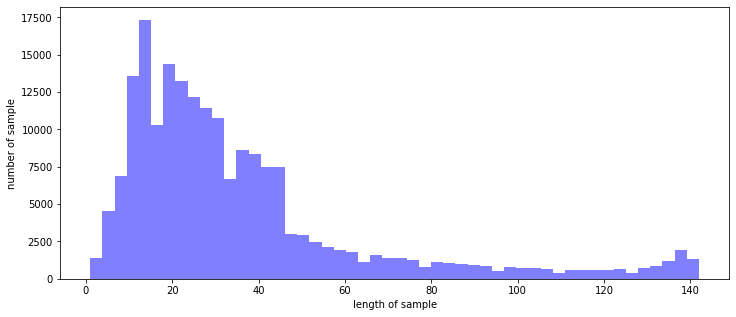

In [10]:
show_distribution(df, 'document')

### 1.3.4 길이별 문장 확인

In [11]:
def check_sentence_with_length(_df, key, length):
    return list(filter(lambda it: len(it) == length, _df[key]))[:20]

In [12]:
check_sentence_with_length(df, 'document', 1)

['굿',
 '핡',
 '휴',
 '시',
 'ㅋ',
 'ㅇ',
 '‥',
 'O',
 '갑',
 'ㅎ',
 '.',
 '올',
 '헷',
 'g',
 '♥',
 '짱',
 'ㅆ',
 '굳',
 '잼',
 'ㅁ']

In [13]:
check_sentence_with_length(df, 'document', 2)

['쵝오',
 '최고',
 '좋아',
 '흐흐',
 '개쩜',
 '굳뜨',
 '좋다',
 '섬뜩',
 '♥♥',
 'ㅎㅎ',
 '대박',
 '잼슴',
 '굳굳',
 '10',
 'ㄹㄹ',
 '윤하',
 '유쾌',
 '긋~',
 '잼남',
 '박수']

In [14]:
check_sentence_with_length(df, 'document', 3)

['재밌다',
 '가연세',
 '재밋다',
 '야마켄',
 '재밌음',
 '좋아요',
 '괜찮네',
 '화려함',
 '좋은데',
 '짱~~',
 '재밋음',
 '굿..',
 '킹왕짱',
 '재밌어',
 '까까~',
 '진짜다',
 '재밌당',
 '명작.',
 '잼있다',
 '재미다']

In [15]:
check_sentence_with_length(df, 'document', 142)

["영화 초반을 보면서 ' 좀 허항된 . 황당한 코믹스런 ' 연출이 되겠다란 생각을 하고 보기시작했는데 .. 연주가 처음 시작되는 부분에서 저도 모르게 눈가가 초촉해 지기시작하더군요 .. 이유는 모르겠네요 ... 자유에 대한 갈증과 박해에 대한 내용을 &gt"]

In [16]:
check_sentence_with_length(df, 'document', 141)

[]

In [17]:
check_sentence_with_length(df, 'document', 140)

['초반엔 황당한 설정이다 싶어 몰입이 힘들었지만 점차 이건 판타지가 아니라 우리의 근미래에 현실이 될지도 모르는 언론탄압에 대한 진지한 은유라는 생각이 들었다. 남자주인공 오카다 준이치는 예상보다 훨씬 좋았다. 별 기대없이 보았는데 의외의 재미와 감동.',
 '개인적으로 재미있었습니다. 언제 팬텀이랑 크리스틴이랑 그런일이 있었는지 전혀 몰랐네요.... ㅠㅠㅠ 일반스토리들 처럼 크리스틴이 다시 남편 곁으로 돌아갔었더라면하는 아쉬움은 있네요 The Beauty Underneath가 젤 좋았어요 개인적으로 ㅋㅋㅋ',
 '그냥 뮤직비디오 본다고 생각하면 훌륭한 작품이다. 동양인 비하라고 하는 분들에게 몇마디하자면 이 영화 자체가 디스를 통한 개그코드를 유지합니다. 남녀 비하, 유태인, 레즈비언, 오타쿠들 등등 동양인도 그소재중 하나지 동양비하가 본 목적은 아니에요 ㅋㅋ',
 '나의 평점은 9점인데, 평균평점이 8점이라 10점으로 주겠다. 오페라 몇편을 감상한듯 전율이 이는 사운드와 자유를 갈망하는 민중의 패기 어린 웅장함이 가슴을 울렸다. 살짝 아쉬운 느낌이 들지만, 한편에 긴 대서사시를 이렇게 옮긴것만 해도 극찬받을만하다',
 '선유야 사랑해 우리 좀있다가 보자!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!♥!!',
 '진짜 평점주러 오는건 처음이다.2년전 영화를 지금 본게 너무 후회스럽다ㅜ진짜 주연배우들이 정말 너무 매력있고 스토리가 너무 잼있다.진짜 어제보고 오늘 또 본 영화는 처음이다.연애하고싶게만드는 영화였고 명대사들이 너무 좋은 영화였다@연애하기좋을날씨다~@',
 '진실평점 8점이상 9점을 준건 평점을 끌어올기위해 10점은 너무 말이 안됨 그렇다고 7점대를 돌아다닐 영화가 아님 헐리웃을 개량하면서 유사한 영화들도 8점대는 다넘는데 이 영화가 못넘다니 조금 웃기고 불편한진실 너훈아가 나훈아만큼

### 1.3.5 max_len 찾기

In [18]:
def below_threshold_len(_df, key, max_len):
    total = df[key]
    _list = list(filter(lambda it: len(it) <= max_len, total))
    print(f'전체 샘플 중 길이가 {max_len} 이하인 샘플의 비율: {len(_list)/len(total)}')

In [19]:
for _len in list(range(0, 140, 10)):
    below_threshold_len(df, 'document', _len)

전체 샘플 중 길이가 0 이하인 샘플의 비율: 0.0
전체 샘플 중 길이가 10 이하인 샘플의 비율: 0.0834057252124209
전체 샘플 중 길이가 20 이하인 샘플의 비율: 0.35149555625234524
전체 샘플 중 길이가 30 이하인 샘플의 비율: 0.5596706126666084
전체 샘플 중 길이가 40 이하인 샘플의 비율: 0.717933824398719
전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.8205640912291884
전체 샘플 중 길이가 60 이하인 샘플의 비율: 0.8586739178484962
전체 샘플 중 길이가 70 이하인 샘플의 비율: 0.8866523082300571
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.9084726769917191
전체 샘플 중 길이가 90 이하인 샘플의 비율: 0.9264995399474666
전체 샘플 중 길이가 100 이하인 샘플의 비율: 0.9405529882853663
전체 샘플 중 길이가 110 이하인 샘플의 비율: 0.9519849082208046
전체 샘플 중 길이가 120 이하인 샘플의 비율: 0.9620289601784695
전체 샘플 중 길이가 130 이하인 샘플의 비율: 0.9730239587134978


* 10 <= 문장길이 <= 70 으로 처리

### 1.3.6 threshold에 맞춰 샘플 제거

In [4]:
df = df[df['document'].apply(lambda it: len(it) >= 10)]
df = df[df['document'].apply(lambda it: len(it) <= 70)]

최대: 70
최소: 10
평균: 28.825650662407217


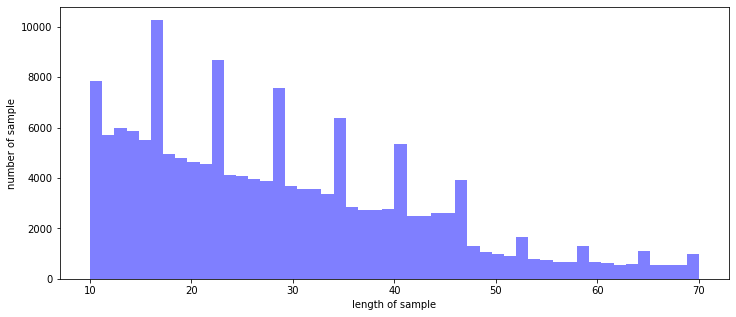

In [21]:
show_distribution(df, 'document')

# 2. 모델 설계 및 학습

In [5]:
models = {}

for model_type in ['unigram', 'bpe', 'char', 'word']:
    for vocab_size in [2000, 4000, 6000, 8000, 10000]:
        
        model_prefix = f'{model_type}_{str(vocab_size // 1000) + "k"}'
        models[model_prefix] = {}
        
        models[model_prefix]['model_type'] = model_type
        models[model_prefix]['vocab_size'] = vocab_size

models

{'unigram_2k': {'model_type': 'unigram', 'vocab_size': 2000},
 'unigram_4k': {'model_type': 'unigram', 'vocab_size': 4000},
 'unigram_6k': {'model_type': 'unigram', 'vocab_size': 6000},
 'unigram_8k': {'model_type': 'unigram', 'vocab_size': 8000},
 'unigram_10k': {'model_type': 'unigram', 'vocab_size': 10000},
 'bpe_2k': {'model_type': 'bpe', 'vocab_size': 2000},
 'bpe_4k': {'model_type': 'bpe', 'vocab_size': 4000},
 'bpe_6k': {'model_type': 'bpe', 'vocab_size': 6000},
 'bpe_8k': {'model_type': 'bpe', 'vocab_size': 8000},
 'bpe_10k': {'model_type': 'bpe', 'vocab_size': 10000},
 'char_2k': {'model_type': 'char', 'vocab_size': 2000},
 'char_4k': {'model_type': 'char', 'vocab_size': 4000},
 'char_6k': {'model_type': 'char', 'vocab_size': 6000},
 'char_8k': {'model_type': 'char', 'vocab_size': 8000},
 'char_10k': {'model_type': 'char', 'vocab_size': 10000},
 'word_2k': {'model_type': 'word', 'vocab_size': 2000},
 'word_4k': {'model_type': 'word', 'vocab_size': 4000},
 'word_6k': {'model_ty

## 2.1 sentence piece 모델 학습

In [13]:
import os

temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

with open(temp_file, 'w') as f:
    for row in df['document']:
        f.write(str(row) + '\n')

In [7]:
import sentencepiece as spm

def TrainSentencePiece(model_prefix, model_type='unigram', vocab_size=8000):
    spm.SentencePieceTrainer.Train(
        '--input={} --model_prefix={} --model_type={} --vocab_size={}'.format(
            temp_file, model_prefix, model_type, vocab_size)    
    )  

In [8]:
for key in models:
    if f'{key}.model' not in os.listdir('./'):
        print(f'#### {key} sentence piece model train start')
        TrainSentencePiece(
            model_prefix=key, 
            model_type=models[key]['model_type'], 
            vocab_size=models[key]['vocab_size'])
        print(f'#### {key} sentence piece model train end')

## 2.2 Classifier Model 학습

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def sp_tokenize(s, corpus, spm):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open(f'{spm}.vocab', 'r') as f: 
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = pad_sequences(tensor, padding='pre')

    return tensor, word_index, index_word

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, LSTM, Embedding
from keras.models import Sequential
from keras.callbacks import EarlyStopping

import sentencepiece as spm
import numpy as np

def TextClassifierModel(model_prefix):   
    
    s = spm.SentencePieceProcessor()
    s.Load(f'{model_prefix}.model')
    
    tensor, word_index, index_word = sp_tokenize(s, df['document'], model_prefix)
    
    x_train, x_val, y_train, y_val = train_test_split(tensor, df['label'], test_size=0.2)
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
    
    word_vector_dim = 32
    
    model = Sequential()
    model.add(Embedding(vocab_size, word_vector_dim))
    model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))
    
    model.summary()
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
    
    epochs=20
    batch_size=64

    history = model.fit(
        x_train, y_train, epochs=epochs, batch_size=batch_size,
        validation_data=(x_val,y_val), callbacks=es, verbose=1)
    
    np.save(f'./histories/{model_prefix}.npy', history.history)
    model.save(f'./models/{model_prefix}.h5')

In [11]:
import os

for key in models:
    if f'./{key}.h5' not in os.listdir('./models'):
        print(f'#### {key} text classifier model train start')
        TextClassifierModel(key)
        print(f'#### {model_prefix} text classifier model train end')

#### unigram_2k text classifier model train start
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 344,897
Trainable params: 344,897
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1597/1597 [==============================] - 14s 6ms/step - loss: 0.4442 - accuracy: 0.7900 - val_loss: 0.4171 - val_accuracy: 0.8081
Epoch 2/20
1597/1597 [==============================] - 10s 6ms/step - loss: 0.3897 - accuracy: 0.8229 - val_loss: 0.3837 - val_accuracy: 0.8258
Epoch 3/20
1597/1597 [==================

1597/1597 [==============================] - 11s 6ms/step - loss: 0.4032 - accuracy: 0.8146 - val_loss: 0.3527 - val_accuracy: 0.8434
Epoch 2/20
1597/1597 [==============================] - 9s 6ms/step - loss: 0.3148 - accuracy: 0.8642 - val_loss: 0.3393 - val_accuracy: 0.8495
Epoch 3/20
1597/1597 [==============================] - 9s 6ms/step - loss: 0.2746 - accuracy: 0.8822 - val_loss: 0.3372 - val_accuracy: 0.8522
Epoch 4/20
1597/1597 [==============================] - 9s 6ms/step - loss: 0.2381 - accuracy: 0.8988 - val_loss: 0.3567 - val_accuracy: 0.8510
Epoch 5/20
1597/1597 [==============================] - 9s 6ms/step - loss: 0.2043 - accuracy: 0.9139 - val_loss: 0.4002 - val_accuracy: 0.8458
Epoch 6/20
1597/1597 [==============================] - 9s 6ms/step - loss: 0.1731 - accuracy: 0.9285 - val_loss: 0.4447 - val_accuracy: 0.8427
Epoch 7/20
1597/1597 [==============================] - 9s 6ms/step - loss: 0.1449 - accuracy: 0.9416 - val_loss: 0.4993 - val_accuracy: 0.8373
Ep

1597/1597 [==============================] - 11s 6ms/step - loss: 0.4708 - accuracy: 0.7734 - val_loss: 0.4330 - val_accuracy: 0.7977
Epoch 2/20
1597/1597 [==============================] - 10s 6ms/step - loss: 0.4080 - accuracy: 0.8114 - val_loss: 0.3940 - val_accuracy: 0.8213
Epoch 3/20
1597/1597 [==============================] - 10s 6ms/step - loss: 0.3763 - accuracy: 0.8293 - val_loss: 0.3795 - val_accuracy: 0.8298
Epoch 4/20
1597/1597 [==============================] - 10s 6ms/step - loss: 0.3561 - accuracy: 0.8414 - val_loss: 0.3788 - val_accuracy: 0.8302
Epoch 5/20
1597/1597 [==============================] - 10s 6ms/step - loss: 0.3398 - accuracy: 0.8494 - val_loss: 0.3693 - val_accuracy: 0.8344
Epoch 6/20
1597/1597 [==============================] - 10s 6ms/step - loss: 0.3254 - accuracy: 0.8565 - val_loss: 0.3691 - val_accuracy: 0.8343
Epoch 7/20
1597/1597 [==============================] - 10s 6ms/step - loss: 0.3146 - accuracy: 0.8627 - val_loss: 0.3685 - val_accuracy: 0.8

# 3. 모델 평가

## 3.1 history 확인

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def show_history(_type):

    fig, ax = plt.subplots(2, 5, figsize=(50, 20))

    index = 0
    
    for key in models:
        if _type in key:
            history = np.load(f'./histories/{key}.npy', allow_pickle='TRUE').item()
            
            epochs = range(1, len(history['loss']) + 1)
            
            ax[0][index].plot(epochs, history['loss'], 'b', alpha=0.5, label='Training loss')
            ax[0][index].plot(epochs, history['val_loss'], 'r', alpha=0.5, label='Validation loss')
            ax[0][index].set_title(f'{key} loss')
            ax[0][index].set_xlabel('Epochs')
            ax[0][index].set_ylabel('Loss')
            ax[0][index].legend()

            ax[1][index].plot(epochs, history['accuracy'], 'b', label='Training acc')
            ax[1][index].plot(epochs, history['val_accuracy'], 'r', label='Validation acc')
            ax[1][index].set_title(f'{key} accuracy')
            ax[1][index].set_xlabel('Epochs')
            ax[1][index].set_ylabel('Accuracy')
            ax[1][index].legend()
            
            index += 1

    plt.show()

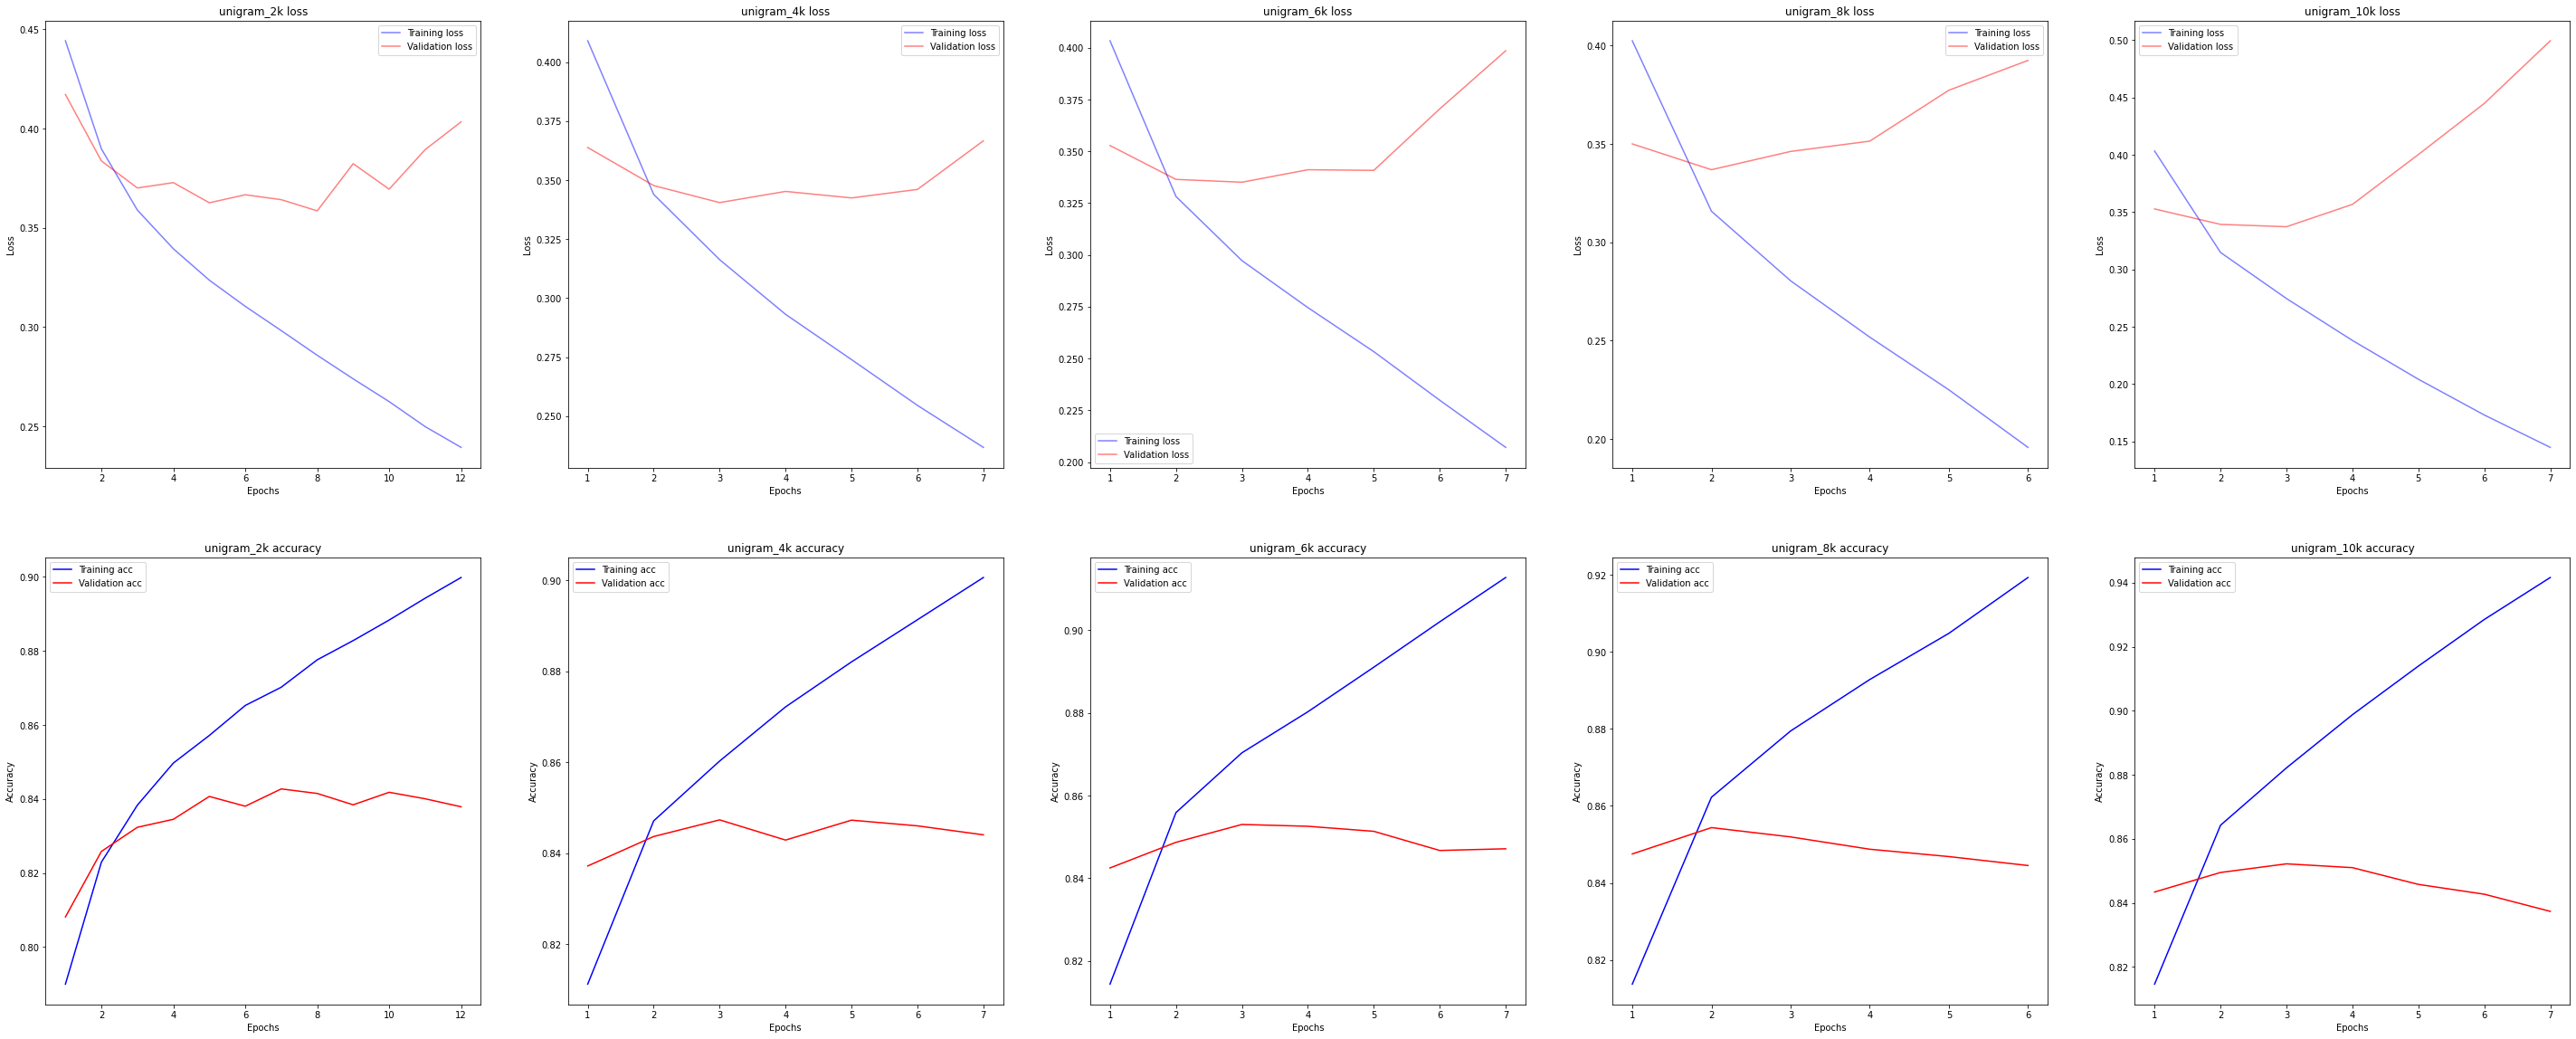

In [9]:
show_history('unigram')

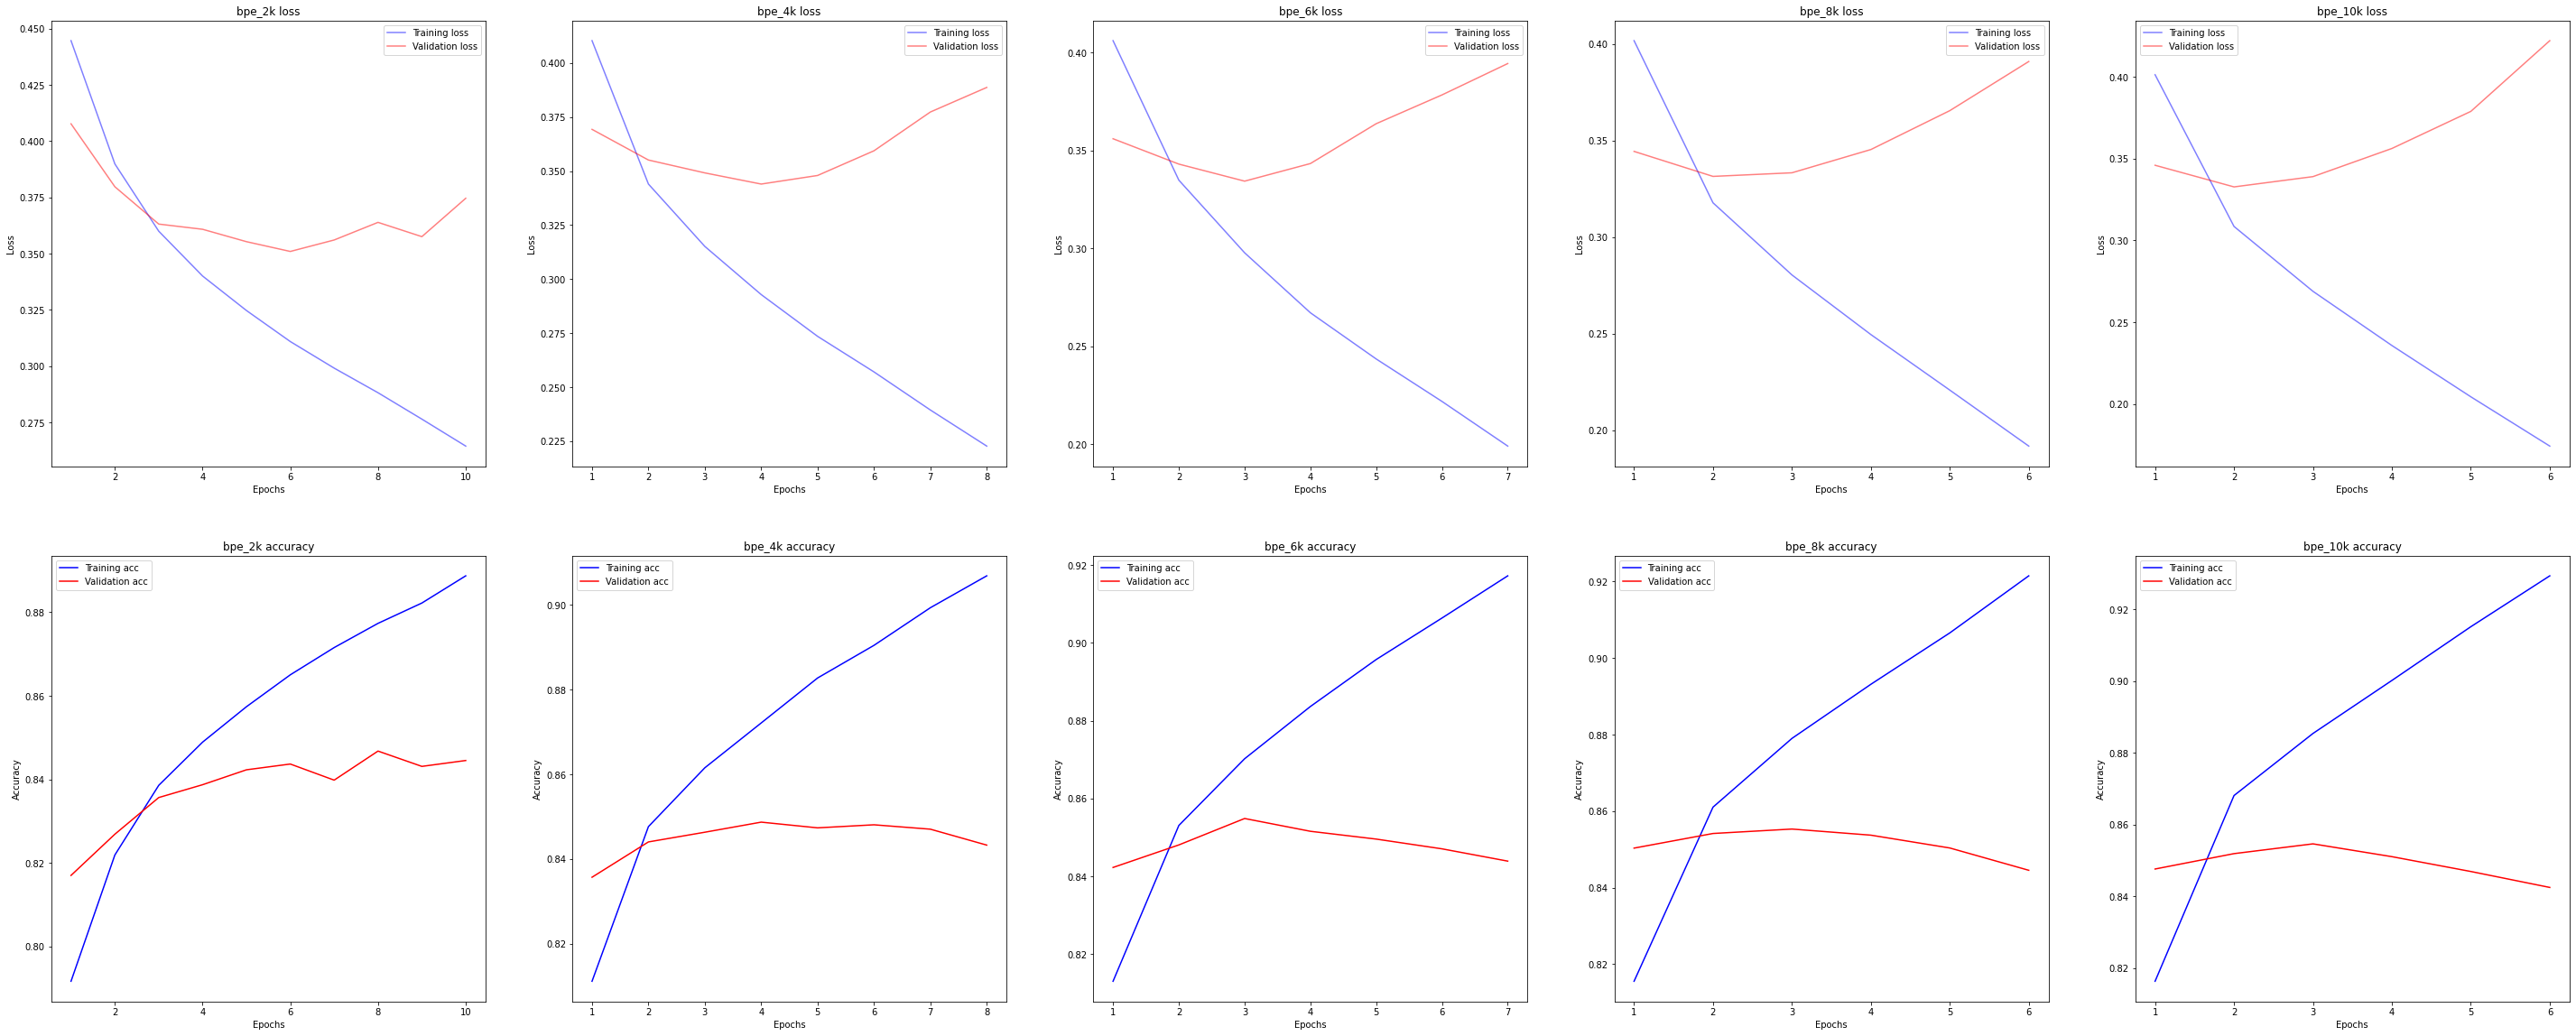

In [10]:
show_history('bpe')

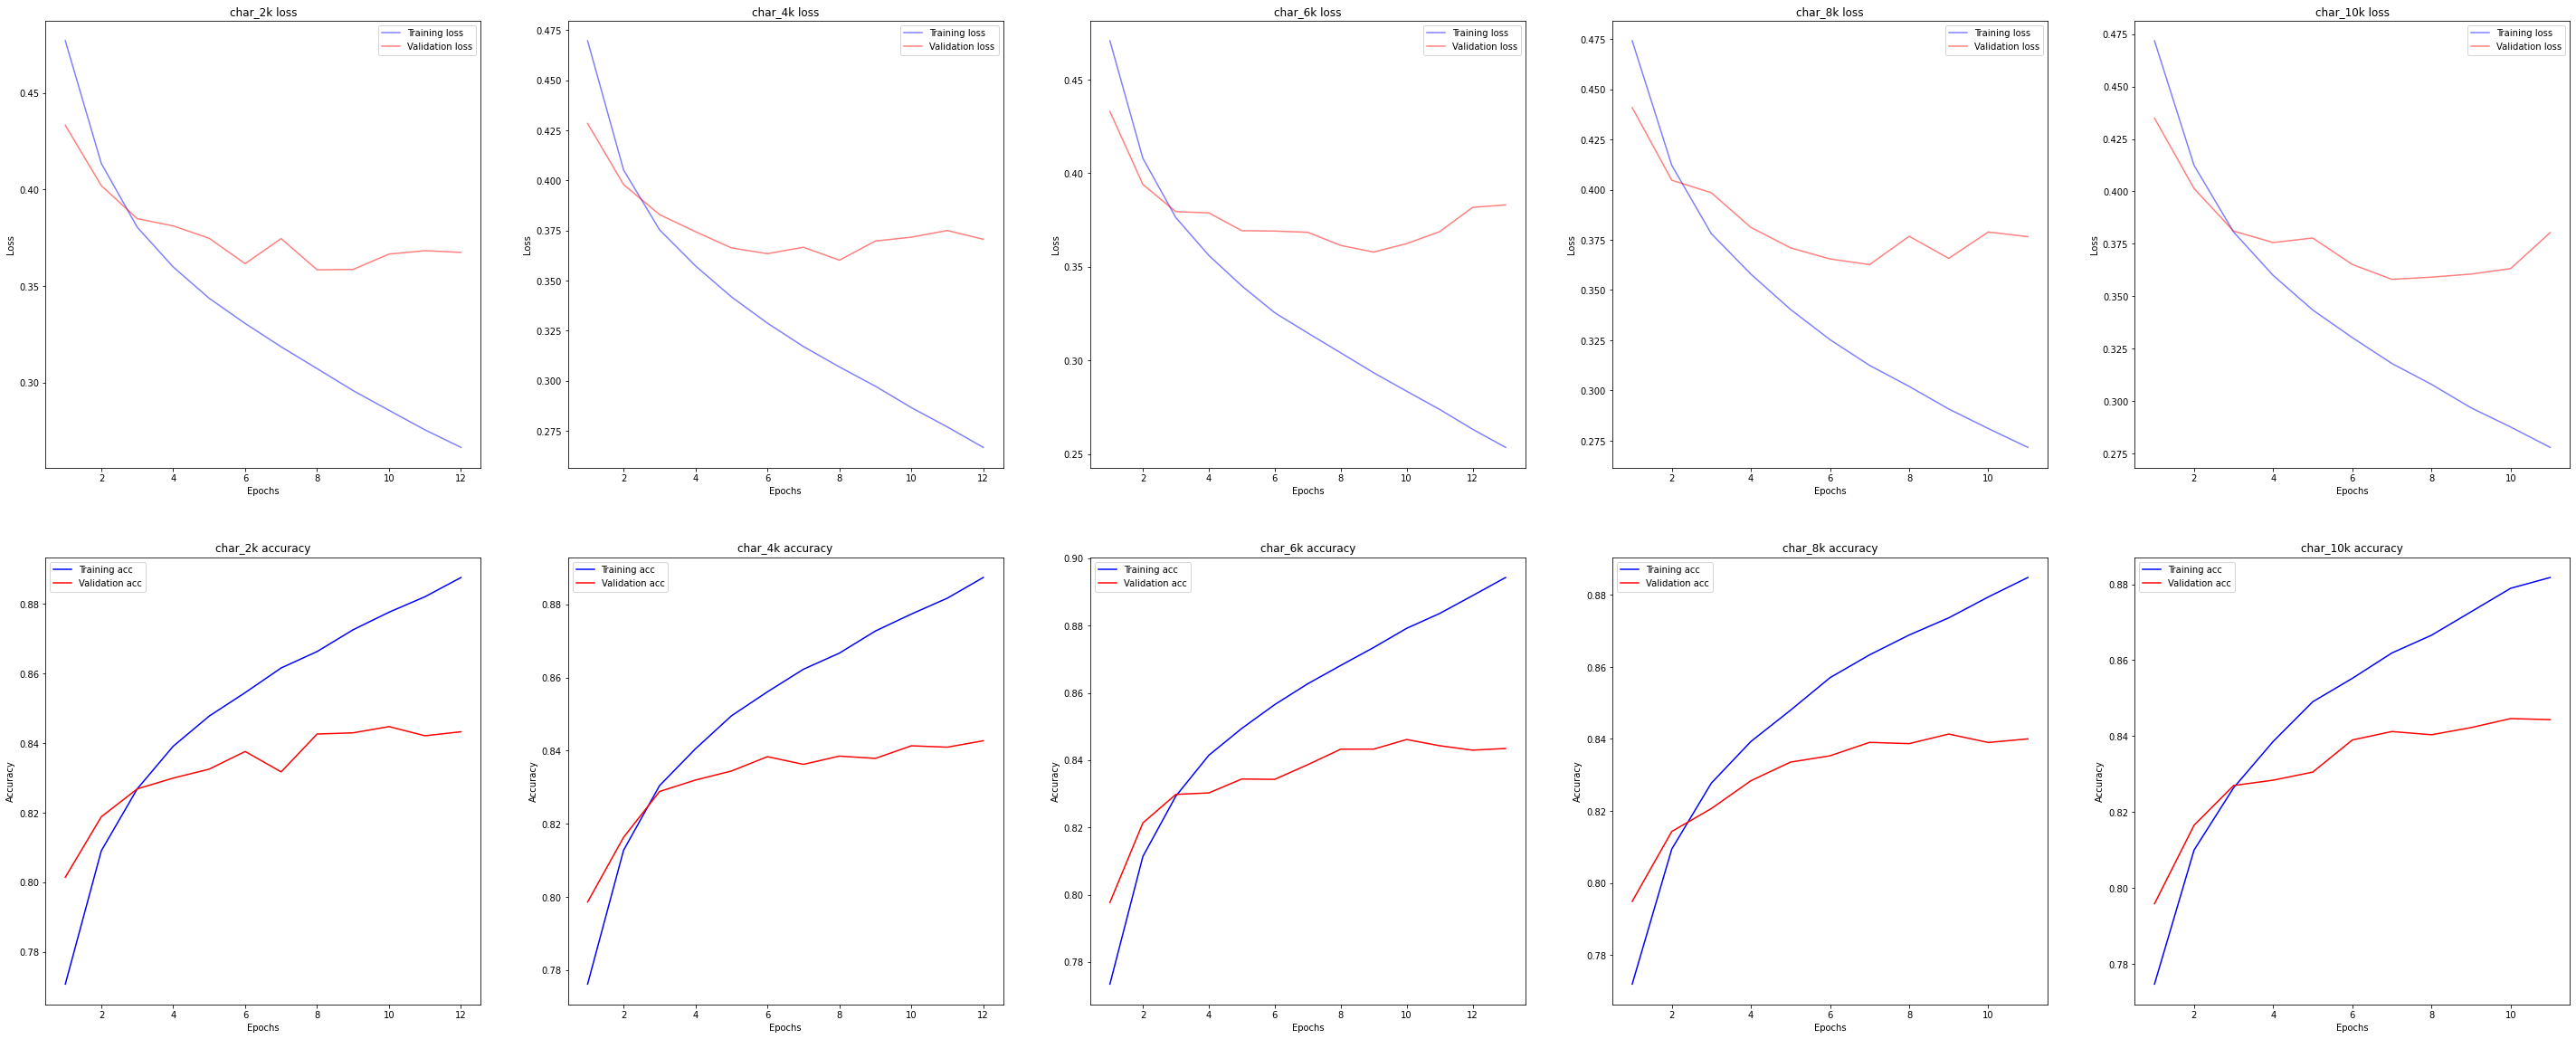

In [11]:
show_history('char')

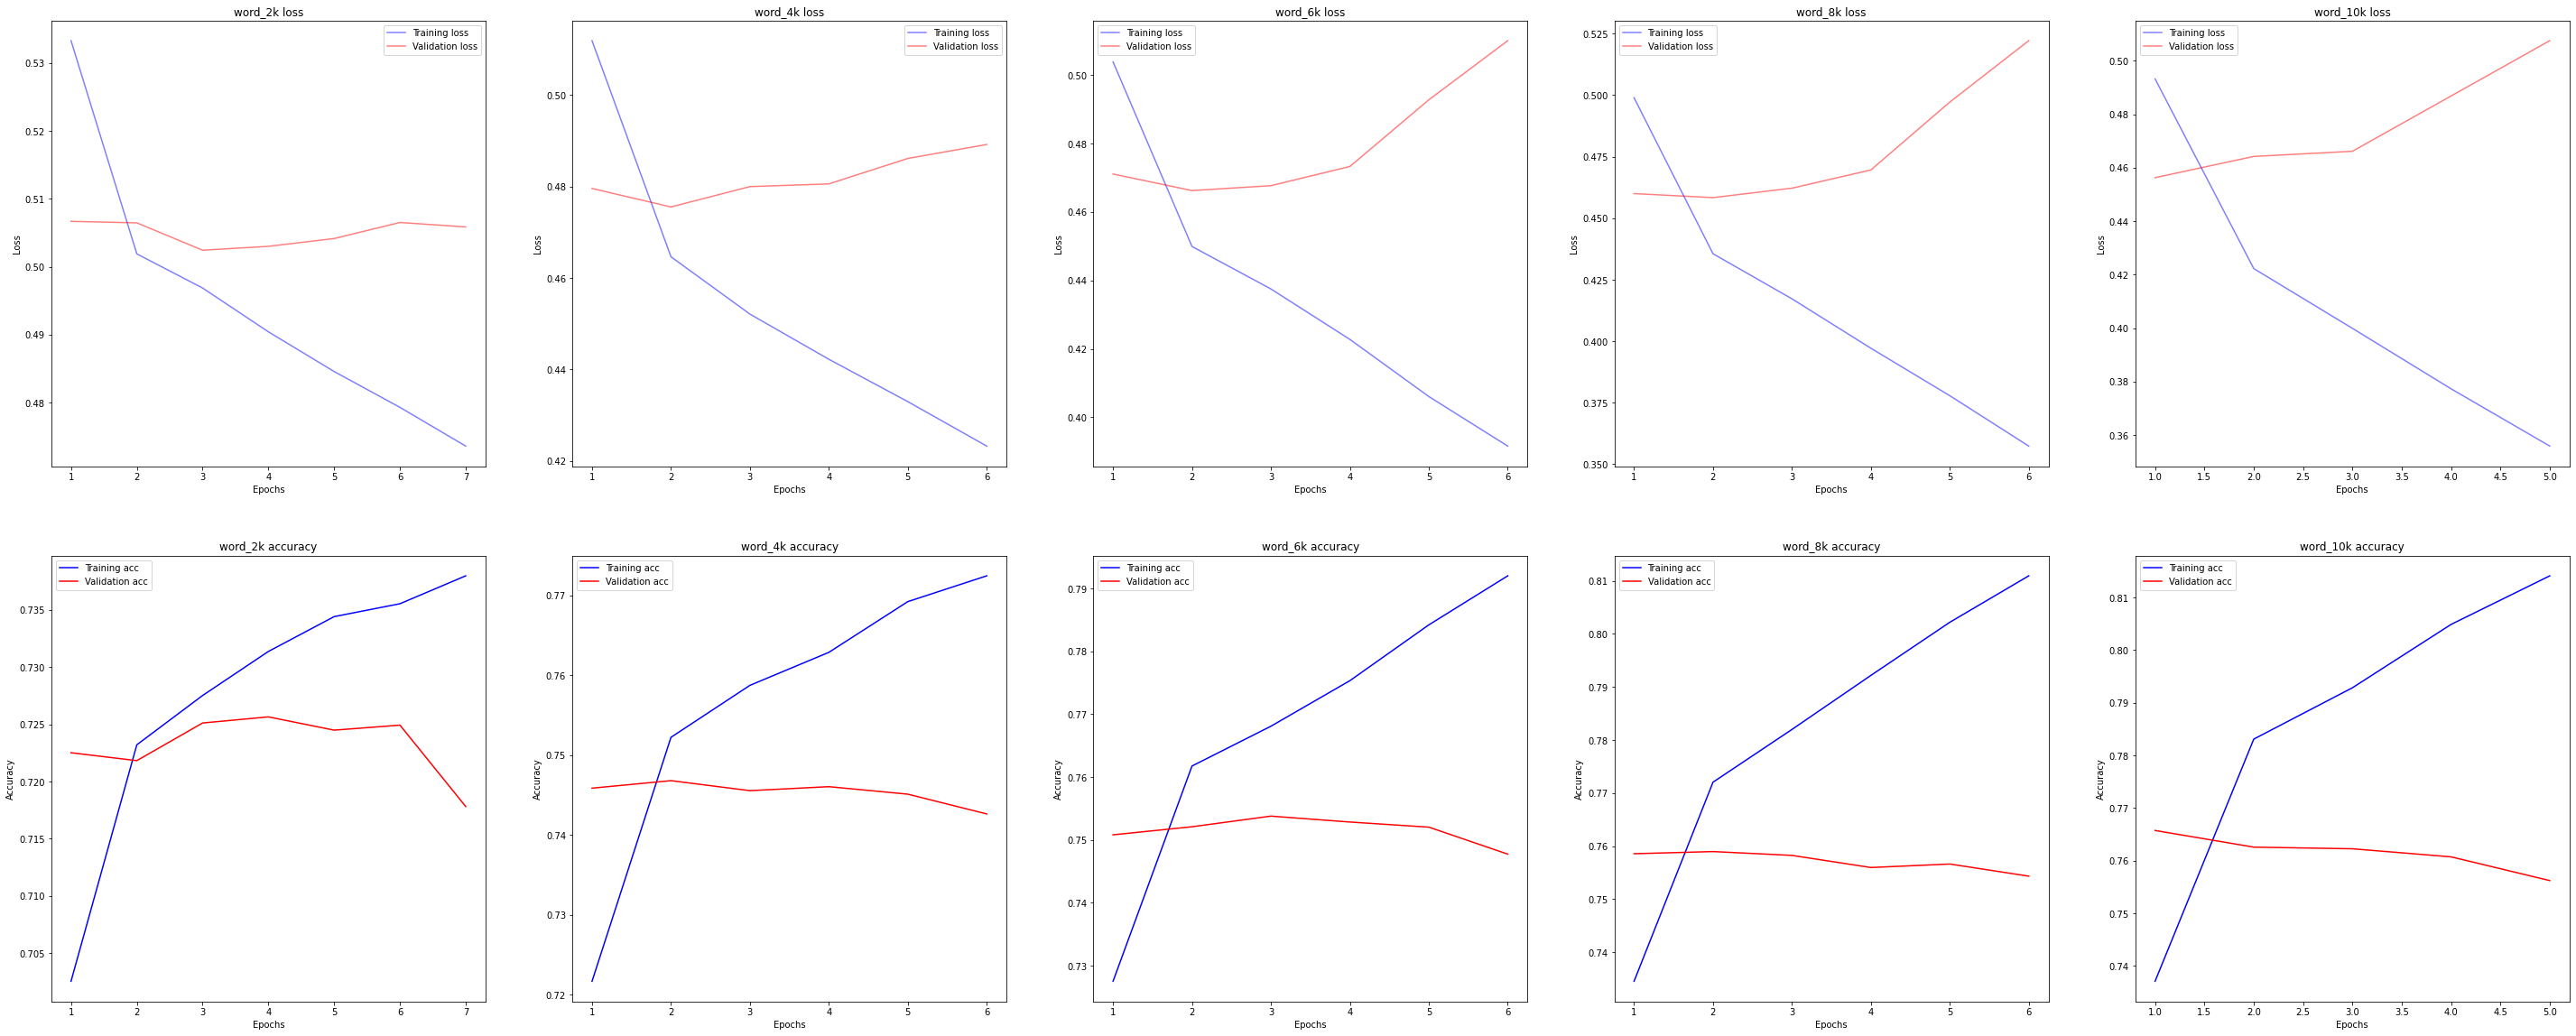

In [12]:
show_history('word')

## 3.2 Model Evaluate

In [16]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import sentencepiece as spm

for key in models:
    
    s = spm.SentencePieceProcessor()
    s.Load(f'{model_prefix}.model')
    
    tensor, word_index, index_word = sp_tokenize(s, df['document'], model_prefix)
    
    x_train, x_val, y_train, y_val = train_test_split(tensor, df['label'], test_size=0.2)
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
    
    model = tf.keras.models.load_model(f'./models/{key}.h5')
    result = model.evaluate(x_test, y_test, verbose=0)
    
    models[key]['accuracy'] = result[1]

In [21]:
import pandas as pd

data = [models[key]['accuracy'] for key in models]
index = [key for key in models]

_df = pd.DataFrame(data, index=index, columns=['accuracy'])

_df

,accuracy
unigram_2k,0.513036
unigram_4k,0.493032
unigram_6k,0.491466
unigram_8k,0.503406
unigram_10k,0.501879
bpe_2k,0.505128
bpe_4k,0.506225
bpe_6k,0.500979
bpe_8k,0.509396
bpe_10k,0.504032


* vocab_size별 비교에서는 2~10k 정도 수준에서는 큰 차이가 없는 것 같고, 토크나이저 별 비교에서는 word 토크나이저가 성능이 좋았음